<a href="https://colab.research.google.com/github/allanbraquiel/Dados-Sobre-Diabetes/blob/master/Dados_Sobre_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dados sobre diabetes**

O conjunto de dados de Diabetes das Índias Pima do Arizona nos EUA, foi desenvolvida pelo
National Institute of Diabetes and Digestive and Kidney Diseases e cedida em 1990 ao repositório da Universidade da Califórnia, Irvine. O conjunto de dados descreve 768 pacientes do género sexual feminino com idades compreendidas entre 21 e 81 anos, divididos em 500 casos que não padecem de Diabetes Mellitus e os restantes sim. 

O conjunto de dados tem 9 atributos:
1. Pregnancies - nº de gravidezes;
2. Glucose - Plasma do Teste Oral de Tolerância à Glicose de 2 horas;
3. Blood Pressure - Pressão sangúinea;
4. Skin Thickness - Espessura da dobra cutânea tricipital (espessura da pele);
5. Insulin - Nível de Insulina em soro de 2 horas;
6. BMI - Índice de Massa Corporal;
7. DiabetesPedigreeFunction - Função de linhagem de diabetes, valores que medem a tendência ao desenvolvimento de diabetes;
8. Age - Idade;
9. Outcome - Surgimento de Diabetes no espaço de 5 anos. Esta é a classe de predição e pode assumir o valor 0=não diabético e 1=diabético.

Fonte da informação: https://jreduardo.github.io/ce064-ml/work5.html

https://comum.rcaap.pt/bitstream/10400.26/18285/1/Lu%C3%ADs-Miguel-Candeias-Borges.pdf

Valores aceitáveis de Insulina em jejum: 100, em qualquer momento: 140

Os valores de referência do exame da glicose em jejum são:

Normal: inferior a 99 mg/dL;

Pré-diabetes: entre 100 e 125 mg/dL;

Diabetes: superior a 126 mg/dL em dois dias diferentes.

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Biblioteca do Plotly para plotar os gráficos 
import cufflinks as cf
cf.go_offline()
import plotly
import plotly.graph_objs as go
import plotly.offline as py

from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

import plotly.express as px
import seaborn as sns

Para renderizar no Colab

In [90]:
import plotly.io as pio
pio.renderers
pio.renderers.default = "colab"

Aqui definimos o tamanho da imagem a partir da biblioteca pylab

In [91]:
import pylab
pylab.rcParams['figure.figsize'] = (15.0, 8.0)

# Análise exploratória dos dados

Carregando o dataset que está disponível em um repositório no github

In [92]:
url = "https://raw.githubusercontent.com/allanbraquiel/Dados-Sobre-Diabetes/master/diabetes.csv"

In [93]:
df = pd.read_csv(url, sep=",", encoding="utf-8")

In [94]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [95]:
df = df.rename(columns={'DiabetesPedigreeFunction': 'PedigreeFunc'})

In [96]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   PedigreeFunc   768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Descrevendo todas as colunas para encontrar os valor mínimo, máximo , média e os quadrantes

In [98]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Verificando a distribuição dos dados

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69aee1df60>,
      dtype=object)

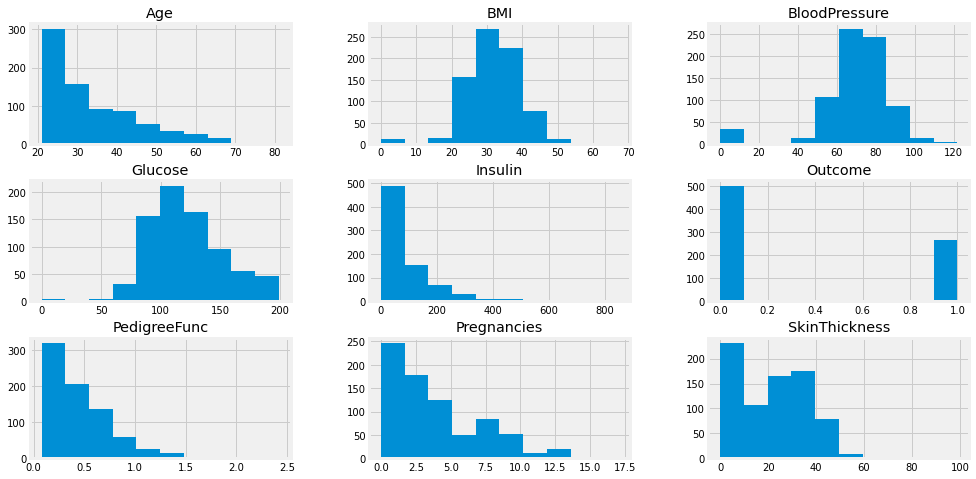

In [99]:
#plt.rcParams["figure.figsize"] = [22, 18]
df.hist(bins=10)

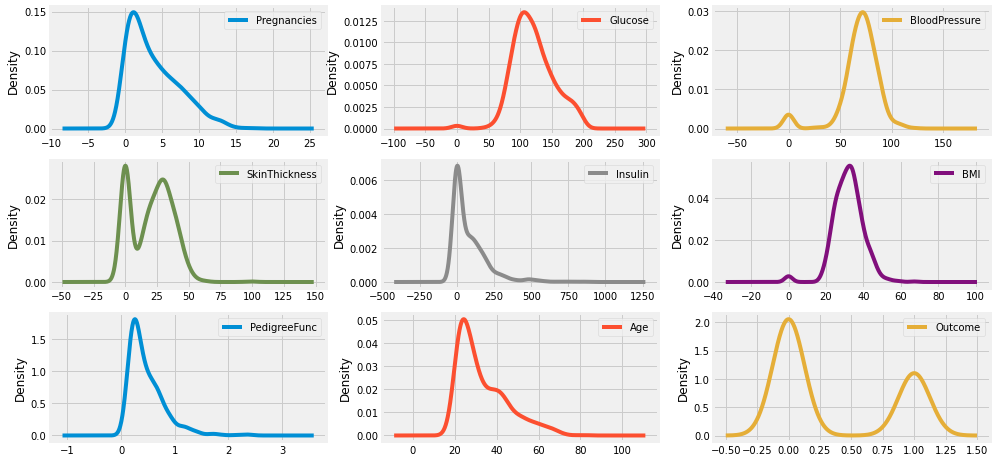

In [100]:
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

In [101]:
plt.style.use("fivethirtyeight")

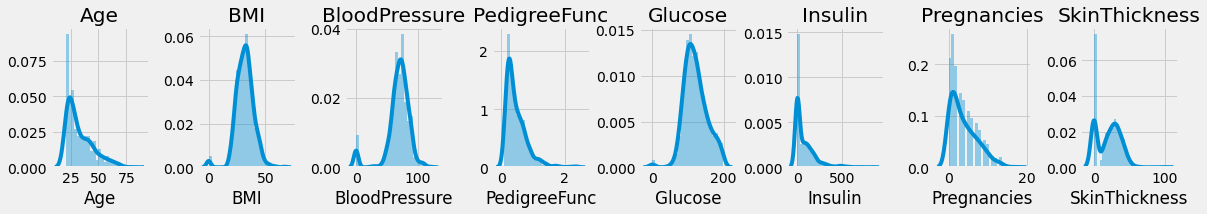

In [102]:
plt.figure(1, figsize=(18, 6))
n = 0
for x in ["Age", "BMI", "BloodPressure", "PedigreeFunc", "Glucose", "Insulin", "Pregnancies", "SkinThickness"]:
  n += 1
  plt.subplot(2, 8, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[x], bins=25)
  plt.title(f"{x}")
plt.show()

Observamos que em algumas colunas como BloodPressure(Presão Sanguínea), Glucose (Glicose), SkinThickness (Espessura da pele), Insulin (Insulina), BMI (Indice de massa corporal), existem alguns registros com valor 0, portanto iremos substituir este valor pela média, para que não interfira do desenpenho do modelo

In [103]:
df[["BloodPressure", "Glucose", "SkinThickness", "Insulin", "BMI"]].describe()

,BloodPressure,Glucose,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,69.105469,120.894531,20.536458,79.799479,31.992578
std,19.355807,31.972618,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.000000,99.000000,0.000000,0.000000,27.300000
50%,72.000000,117.000000,23.000000,30.500000,32.000000
75%,80.000000,140.250000,32.000000,127.250000,36.600000
max,122.000000,199.000000,99.000000,846.000000,67.100000


Substituindo o valores 0 por NAN e depois utilizando os metodos forward ou backward para substituir os valores

In [104]:
def replace_nan(dados):
  dados = dados[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)
  return dados

In [105]:
df2 = df.copy()
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,PedigreeFunc,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [106]:
df2 = replace_nan(df)
df2['Pregnancies'] = df['Pregnancies']
df2['PedigreeFunc'] = df['PedigreeFunc']
df2['Age'] = df['Age']
df2['Outcome'] = df['Outcome']
df2.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,PedigreeFunc,Age,Outcome
0,148.0,72.0,35.0,NaN,33.6,6,0.627,50,1
1,85.0,66.0,29.0,NaN,26.6,1,0.351,31,0
2,183.0,64.0,NaN,NaN,23.3,8,0.672,32,1
3,89.0,66.0,23.0,94.0,28.1,1,0.167,21,0
4,137.0,40.0,35.0,168.0,43.1,0,2.288,33,1


In [107]:
def replace_forward(dados):
  dados['Glucose'] = dados['Glucose'].fillna(method='ffill')
  dados['BloodPressure'] = dados['BloodPressure'].fillna(method='ffill')
  dados['SkinThickness'] = dados['SkinThickness'].fillna(method='ffill')
  dados['Insulin'] = dados['Insulin'].fillna(method='bfill')
  dados['Insulin'] = dados['Insulin'].fillna(method='ffill')
  dados['BMI'] = dados['BMI'].fillna(method='ffill')
  return dados

In [108]:
df3 = replace_forward(df2)

In [109]:
df3.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,PedigreeFunc,Age,Outcome
0,148.0,72.0,35.0,94.0,33.6,6,0.627,50,1
1,85.0,66.0,29.0,94.0,26.6,1,0.351,31,0
2,183.0,64.0,29.0,94.0,23.3,8,0.672,32,1
3,89.0,66.0,23.0,94.0,28.1,1,0.167,21,0
4,137.0,40.0,35.0,168.0,43.1,0,2.288,33,1


In [110]:
df3.isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pregnancies      0
PedigreeFunc     0
Age              0
Outcome          0
dtype: int64

In [111]:
df3[["BloodPressure", "Glucose", "SkinThickness", "Insulin", "BMI"]].describe()

,BloodPressure,Glucose,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,72.308594,121.514323,29.257812,160.497396,32.482031
std,12.375474,30.531191,10.544310,135.069918,6.908600
min,24.000000,44.000000,7.000000,14.000000,18.200000
25%,64.000000,99.000000,21.000000,76.000000,27.500000
50%,72.000000,117.000000,29.000000,120.000000,32.350000
75%,80.000000,140.250000,36.000000,191.250000,36.725000
max,122.000000,199.000000,99.000000,846.000000,67.100000


Verificando a distribuição novamente

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f69b579b3c8>,
      dtype=object)

<Figure size 1296x432 with 0 Axes>

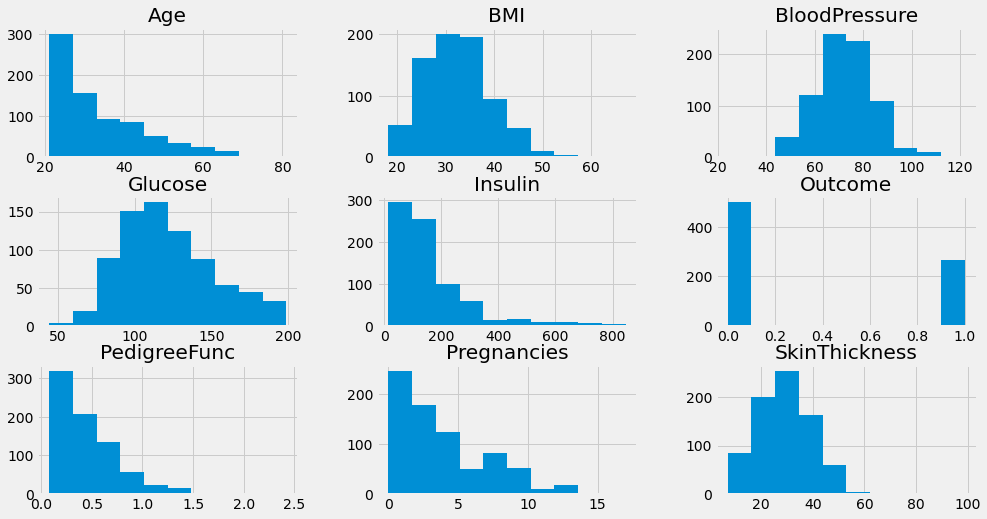

In [112]:
plt.figure(1, figsize=(18, 6))
df3.hist(bins=10)

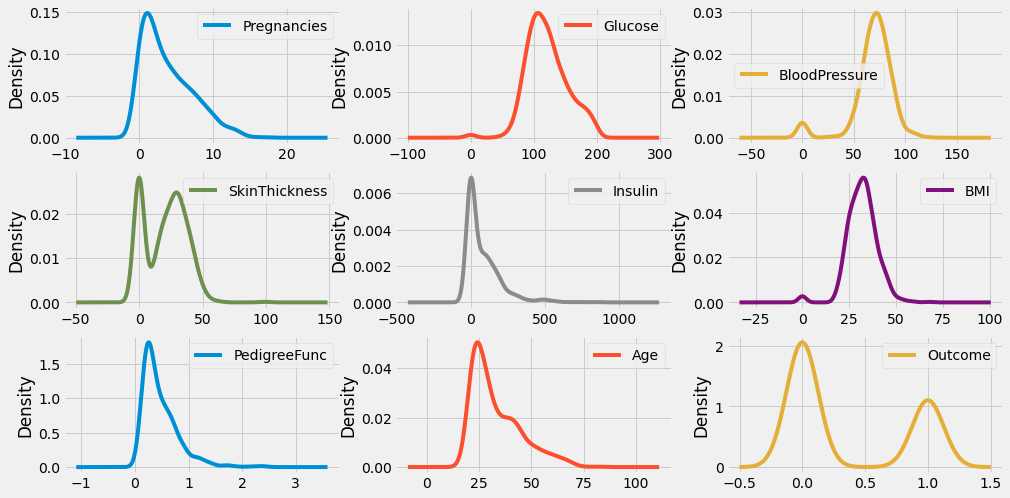

In [113]:
df.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

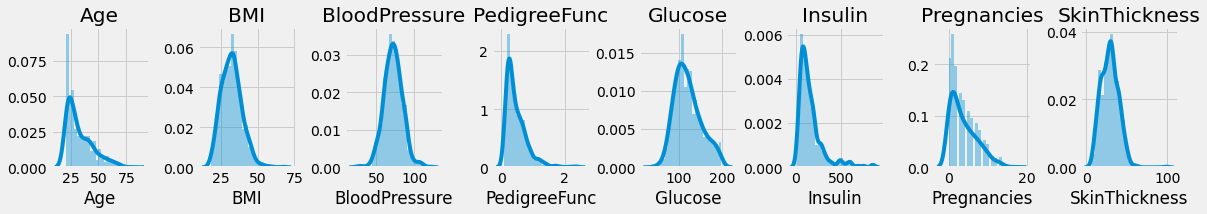

In [114]:
plt.figure(1, figsize=(18, 6))
n = 0
for x in ["Age", "BMI", "BloodPressure", "PedigreeFunc", "Glucose", "Insulin", "Pregnancies", "SkinThickness"]:
  n += 1
  plt.subplot(2, 8, n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df3[x], bins=25)
  plt.title(f"{x}")
plt.show()

O boxplot mostra os valores mínimos e máximo, média, mediana e os valores discrepantes do valores normais(outliers)

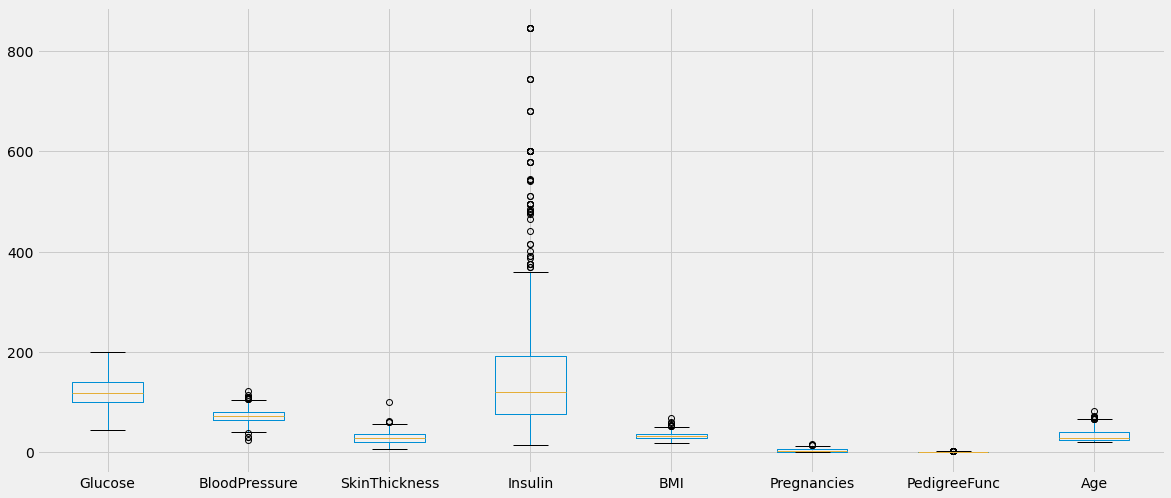

In [115]:
plt.figure(figsize=(18, 8))
df3.boxplot(column=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pregnancies', 'PedigreeFunc', 'Age'])

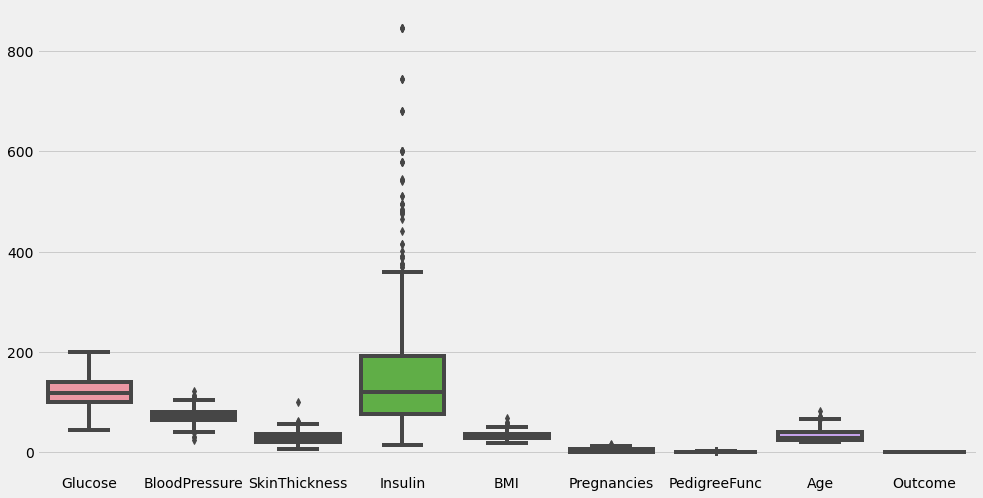

In [116]:
sns.boxplot(data = df3, orient= 'v')

<Figure size 864x360 with 0 Axes>

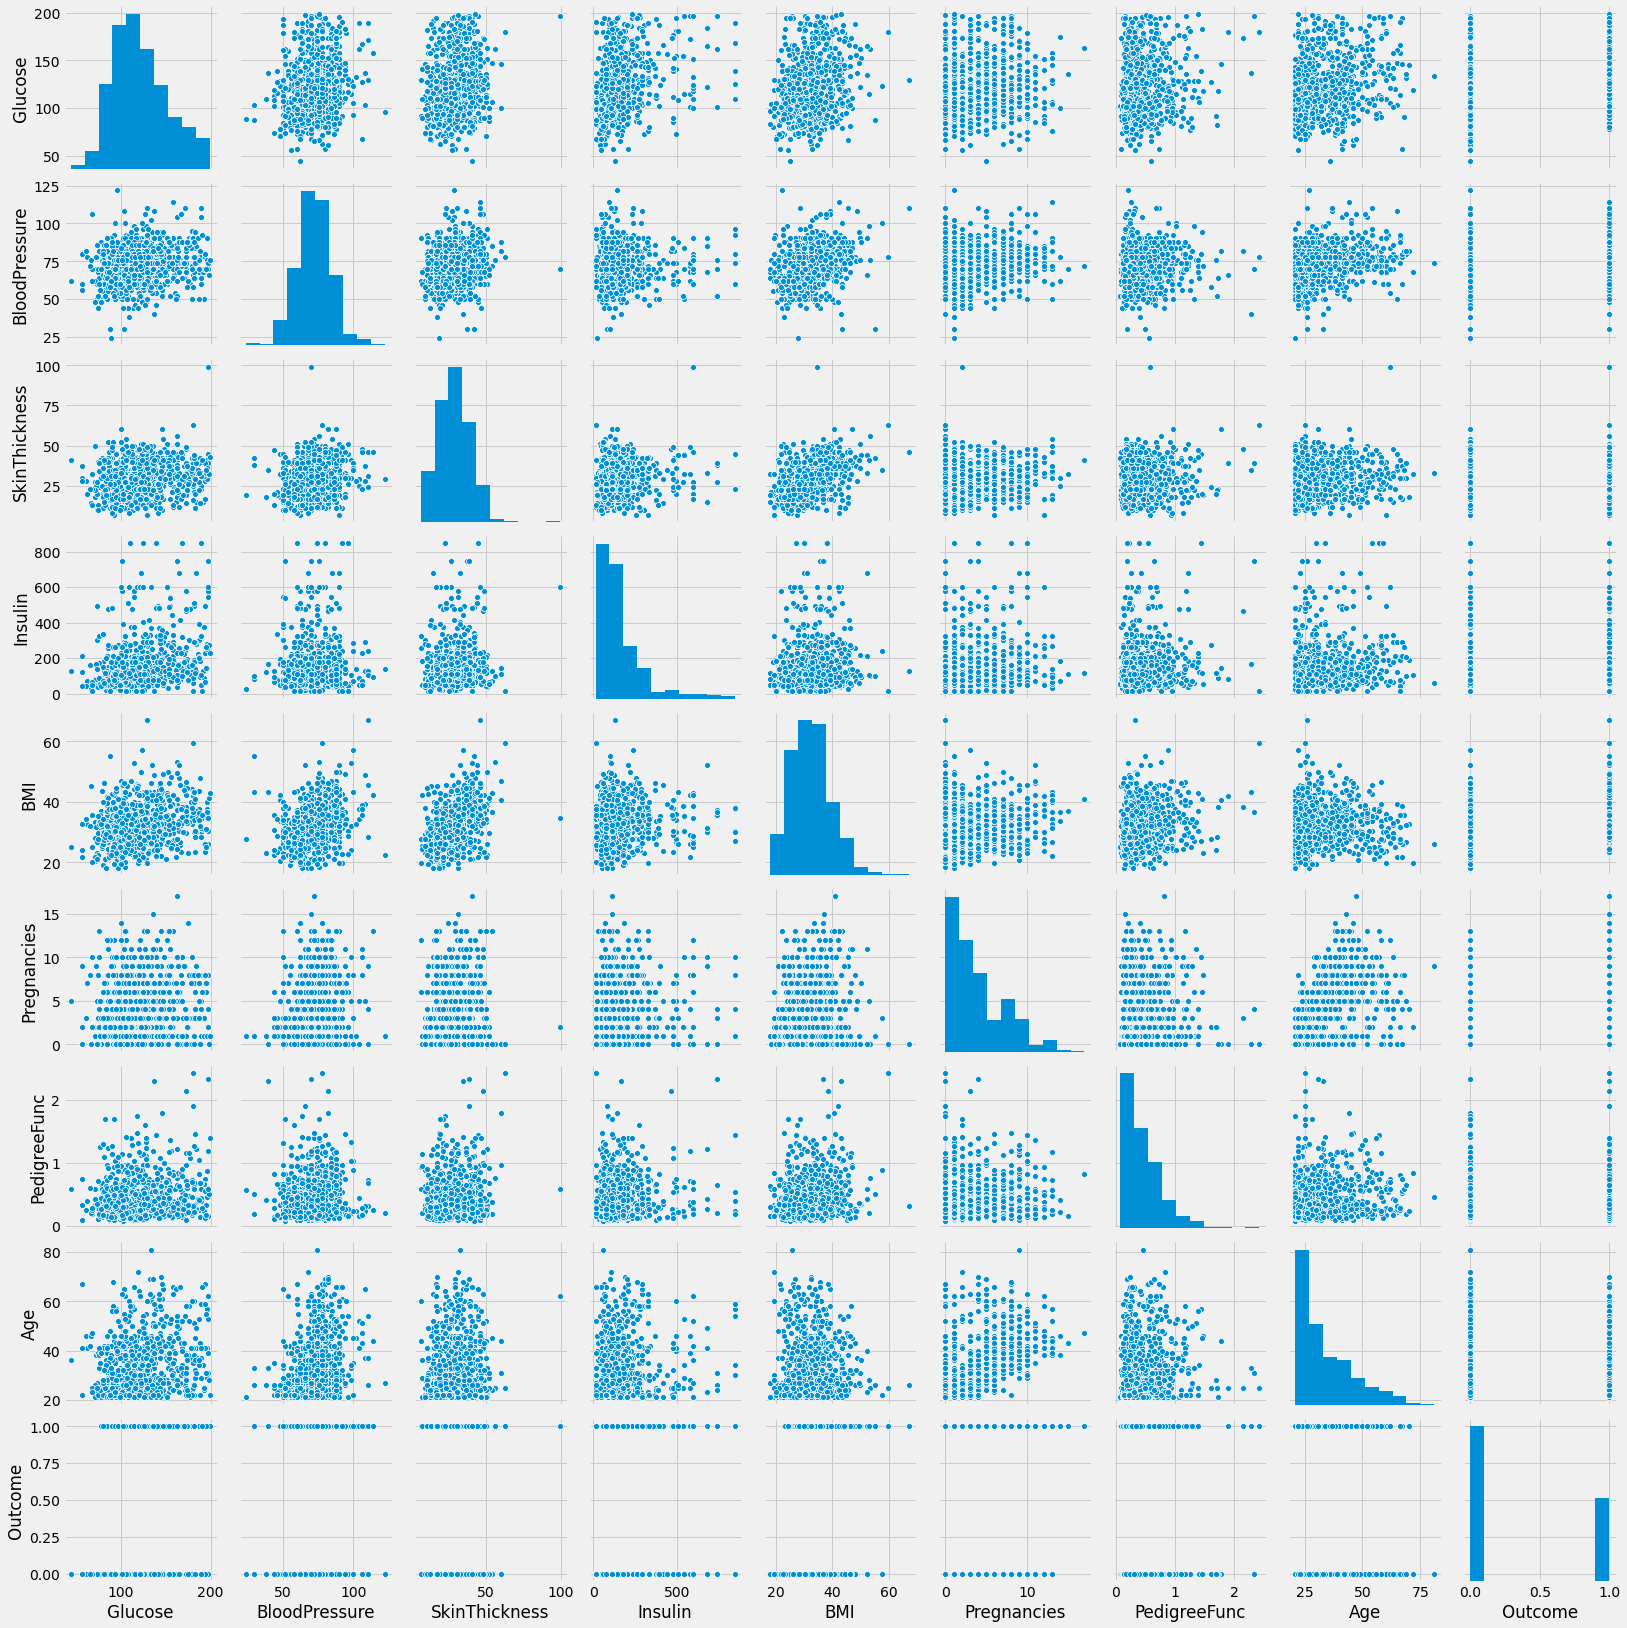

In [117]:
plt.figure(figsize=(12, 5))
sns.pairplot(df3)

Este gráfico mostra a relação dos entre as colunas Glucose e Insulin, onde o mais escuro mostra os não diabéticos e o mais claro mostra os diabéticos

In [119]:
fig = px.scatter(df3, x="Glucose", y="Insulin", color="Outcome", title="Relação entre Glicose e Insulina")
fig.show()

Este gráfico mostra a relação entre a taxa de glicose e a idade da pessoa, onde as informaçoes mais escuras são de não diabéticos e o mais claro de diabéticos

In [120]:
fig = px.scatter(df3, x="Glucose", y="Age", color="Outcome", title="Relação entre Glicose e idade")
fig.show()

Agora, a relação por idade e nível de insulina

In [121]:
fig = px.scatter(df3, x="Insulin", y="Age", color="Outcome", title="Distribuição por Nível de Insulina e Idade")
fig.show()

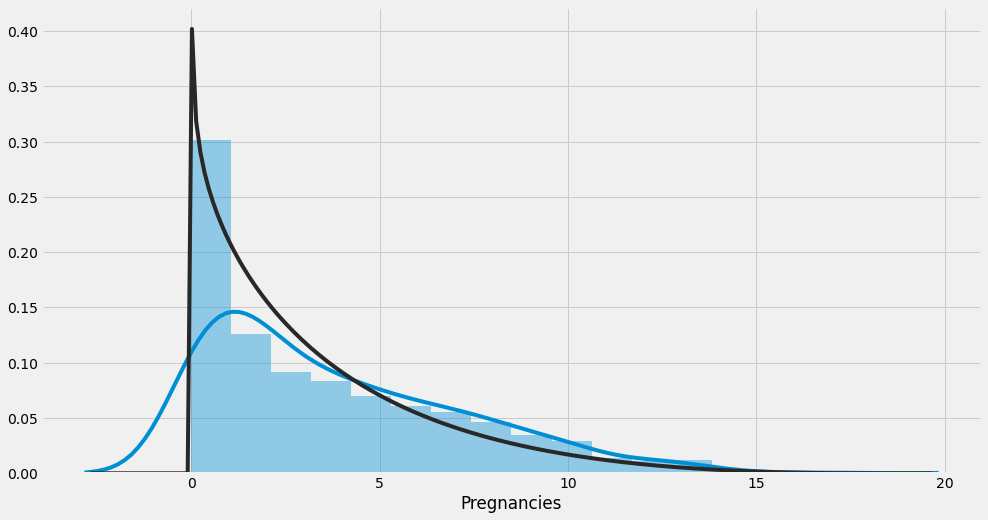

In [122]:
from scipy import stats
sns.distplot(df3.Pregnancies, fit= stats.gausshyper)

# Criação do modelo de Machine Learning

Documentação do Scikit-learn
https://scikit-learn.org/stable/user_guide.html

OBS:  
Usar tree.Classifier primeiro par indetificar as melhores Features 
Noramlizar somente as features (X) não o target

Usando um mapa de calor usando o Seaborn para verificar a correlação entre as colunas, sendo que 1 determina uma correlaçao perfeita, -1 a anti correlação perfeita e 0 mostra que não tem correlação nenhuma

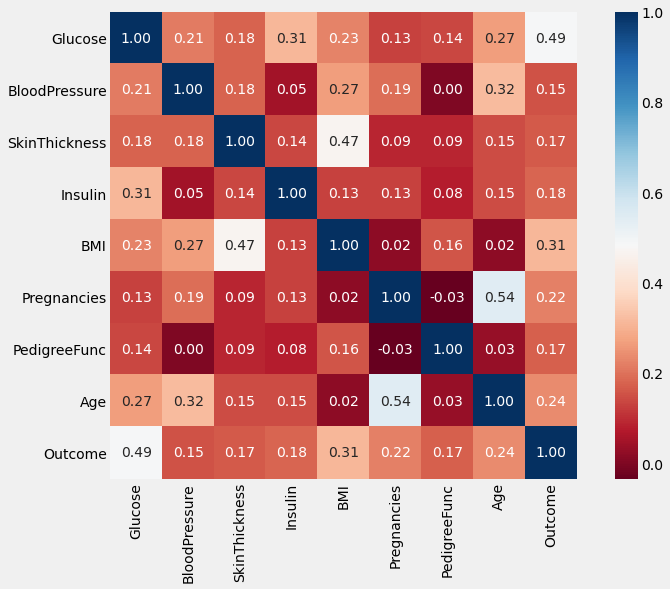

In [123]:
df_correlacao = df3.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df_correlacao, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);
#plt.show()

Separando as features

In [124]:
x_data = df3.drop(["Outcome"], axis=1, inplace=False)
y_data = df3["Outcome"]

Normalizando os dados

In [125]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(x_data)
colunas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Pregnancies', 'PedigreeFunc', 'Age']
X = pd.DataFrame(X)
X.columns = colunas

# Este ação age como o MinMaxScaler
# X = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [126]:
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pregnancies,PedigreeFunc,Age
0,0.670968,0.489796,0.304348,0.096154,0.314928,0.352941,0.234415,0.483333
1,0.264516,0.428571,0.239130,0.096154,0.171779,0.058824,0.116567,0.166667
2,0.896774,0.408163,0.239130,0.096154,0.104294,0.470588,0.253629,0.183333
3,0.290323,0.428571,0.173913,0.096154,0.202454,0.058824,0.038002,0.000000
4,0.600000,0.163265,0.304348,0.185096,0.509202,0.000000,0.943638,0.200000


Separando os dados de teste e de treino

In [127]:
"""
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3, random_state=42) 

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)
"""

# verificar o modelo usando o pacote cross validation
# O cross validation funciona de forma diferente do train test split, ele já treina e testa o modelo
# Exemplo:
from sklearn.model_selection import cross_validate
#from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3, random_state=42) 
num_folds = 10 #>> numero folds da validação cruzada
num_instances = len(X) #>> numeor de instancias
seed = 7 #>> numero do seed garante que o resultado seja sempre o mesmo
#kfold = cross_validate.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
# modelo = ? >> chama o modelo de ML
# resultado cross_validation.cross_val_score(modelo, X, y, cv = kfold) >> cv siginifca a metrica para avaliar o modelo >> cross_val_score treina e testa o modelo

# Feature Selection

In [137]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

teste = SelectKBest(score_func = chi2, k=5)
fit = teste.fit(X,y_data)

print(fit.scores_)
features = fit.transform(X)

features = pd.DataFrame(features)
print(features)

[14.29479629  0.58694153  1.17492584  3.80262238  5.03536739  6.5599818
  2.75858391  8.20569067]
            0         1         2         3         4
0    0.670968  0.096154  0.314928  0.352941  0.483333
1    0.264516  0.096154  0.171779  0.058824  0.166667
2    0.896774  0.096154  0.104294  0.470588  0.183333
3    0.290323  0.096154  0.202454  0.058824  0.000000
4    0.600000  0.185096  0.509202  0.000000  0.200000
..        ...       ...       ...       ...       ...
763  0.367742  0.199519  0.300613  0.588235  0.700000
764  0.503226  0.117788  0.380368  0.117647  0.100000
765  0.496774  0.117788  0.163599  0.294118  0.150000
766  0.529032  0.117788  0.243354  0.058824  0.433333
767  0.316129  0.117788  0.249489  0.058824  0.033333

[768 rows x 5 columns]


In [142]:
#features2 = pd.Series(fit.transform(X))#, index=X.columns)
#features2

# Decision Tree Classifier

In [129]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
arvore = DecisionTreeClassifier()

In [130]:
arvore.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [131]:
result = arvore.predict(x_test)

In [132]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, result))
print(metrics.classification_report(y_test, result))

[[108  43]
 [ 28  52]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75       151
           1       0.55      0.65      0.59        80

    accuracy                           0.69       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.69      0.70       231



Features mais importantes para o modelo

In [133]:
arvore.feature_importances_

array([0.32634645, 0.06704995, 0.05229775, 0.15605649, 0.15496094,
       0.02379532, 0.10196562, 0.11752748])

In [134]:
feature_imp = pd.Series(arvore.feature_importances_, index=X.columns)

In [143]:
feature_imp.sort_values(ascending=False)

Glucose          0.326346
Insulin          0.156056
BMI              0.154961
Age              0.117527
PedigreeFunc     0.101966
BloodPressure    0.067050
SkinThickness    0.052298
Pregnancies      0.023795
dtype: float64

Visualizando as Features mai importantes

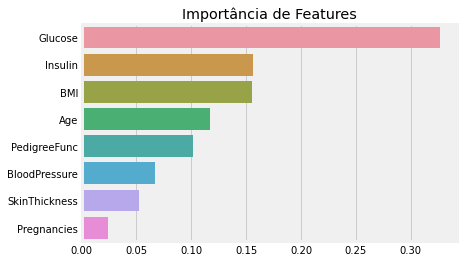

In [144]:
%matplotlib inline
feature_imp_sort = feature_imp.sort_values(ascending=False)
sns.barplot(x=feature_imp_sort, y=feature_imp_sort.index)
plt.title("Importância de Features")
plt.show()

Agora que sabemos as features mais importante podemos usar somente algumas delas

In [145]:
X = X.drop(["Pregnancies", "SkinThickness", "BloodPressure"], axis=1)

In [146]:
x_train, x_test, y_train, y_test = train_test_split(X, y_data, test_size=0.3, random_state=42) 

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

x train:  (537, 5)
x test:  (231, 5)
y train:  (537,)
y test:  (231,)


In [147]:
arvore.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:
result_arvore = arvore.predict(x_test)

In [149]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Confusion matrix: \n", confusion_matrix(y_test, result_arvore))
print("\nScore: \n", arvore.score(x_test, y_test))
print("\nClassification Report: \n",metrics.classification_report(y_test, result_arvore))

Confusion matrix: 
 [[103  48]
 [ 32  48]]

Score: 
 0.6536796536796536

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       151
           1       0.50      0.60      0.55        80

    accuracy                           0.65       231
   macro avg       0.63      0.64      0.63       231
weighted avg       0.67      0.65      0.66       231



#KNeighborsClassifier (KNN)

In [150]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17, p=12)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=12,
                     weights='uniform')

In [151]:
from sklearn.metrics import classification_report

result_knn = knn.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, result_knn))
print("\nScore: \n", knn.score(x_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, result_knn))

Confusion Matrix:
 [[121  30]
 [ 30  50]]

Score: 
 0.7402597402597403

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



#Redes Neurais (MLPClassifier)

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [153]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(10, 3, 10), max_iter=1000)
mlp.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 3, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [154]:
result_mlp = mlp.predict(x_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, result_mlp))
print("\nScore: \n", mlp.score(x_test, y_test))
print("\nClassification Report: \n",classification_report(y_test, result_mlp))

Confusion Matrix:
 [[118  33]
 [ 31  49]]

Score: 
 0.7229437229437229

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       151
           1       0.60      0.61      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.72      0.72      0.72       231



# Suporte Vector Machine (SVM)

In [172]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
result_svm = svc.predict(x_test)

In [173]:
print("Confusion Matrix:\n", confusion_matrix(y_test, result_svm))
print("\nScore: \n", svc.score(x_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, result_svm))

Confusion Matrix:
 [[122  29]
 [ 35  45]]

Score: 
 0.7229437229437229

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       151
           1       0.61      0.56      0.58        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



## Naive Bayes

In [157]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)
result_gnb = gnb.predict(x_test)

In [158]:
print("Confusion Matrix:\n", confusion_matrix(y_test, result_gnb))
print("\nScore: \n", gnb.score(x_test, y_test))
print("\nClassification Report: \n", classification_report(y_test, result_gnb))

Confusion Matrix:
 [[121  30]
 [ 31  49]]

Score: 
 0.7359307359307359

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80       151
           1       0.62      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



# Regressão Logistica

In [159]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
result_lr = lr.predict(x_test)

In [160]:
print("Confusion Matrix:\n", confusion_matrix(y_test, result_lr))
print("\nScore: \n", lr.score(x_test, y_test))
print("\nClassification Report: \n", classification_report(y_test, result_lr))

Confusion Matrix:
 [[123  28]
 [ 33  47]]

Score: 
 0.7359307359307359

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



# Random Forest

In [161]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200, max_depth=100, bootstrap=True, random_state=0)
rf.fit(x_train, y_train)
result_rf = rf.predict(x_test)

In [162]:
print("Confusion Matrix:\n", confusion_matrix(y_test, result_rf))
print("\nScore: \n", rf.score(x_test, y_test))
print("\nClassification Report: \n", classification_report(y_test, result_rf))

Confusion Matrix:
 [[116  35]
 [ 26  54]]

Score: 
 0.7359307359307359

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.77      0.79       151
           1       0.61      0.68      0.64        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



# Seleção do Modelo Preditivo

In [163]:
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, train_test_split, GridSearchCV

# Definindo os valores para o número de folds
num_folds = 5
num_instances = len(X)
seed = 7

# Preparando o modelo

modelos = []
modelos.append(("LR", LogisticRegression()))
modelos.append(("DT", DecisionTreeClassifier()))
modelos.append(("KNN", KNeighborsClassifier()))
modelos.append(("MLP", MLPClassifier(max_iter=500)))
modelos.append(("SVM", SVC()))
modelos.append(("NB", GaussianNB()))
modelos.append(("RF", RandomForestClassifier()))

# Avaliando cada modelo
resultados = []
nomes = []

for nome, modelo in modelos:
   kfold = KFold(n_splits = num_folds, shuffle=True, random_state = seed)
   cv_results = cross_val_score(modelo, X, y_data, cv = kfold, scoring = 'accuracy')
   resultados.append(cv_results)
   nomes.append(nome)
   msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.766853 (0.032066)
DT: 0.701825 (0.042879)
KNN: 0.735668 (0.040462)
MLP: 0.777294 (0.029898)
SVM: 0.765546 (0.036692)
NB: 0.759104 (0.023067)
RF: 0.757779 (0.030014)


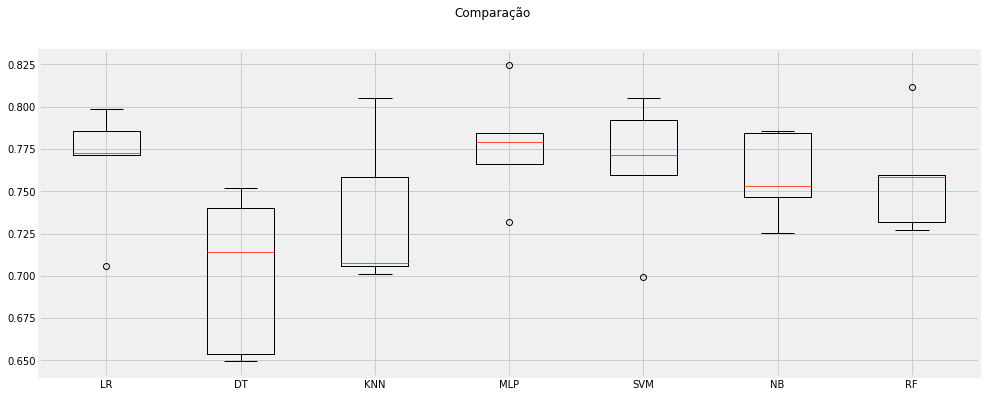

In [164]:
# Boxplot para comparar os algoritmos
fig = plt.figure(figsize = (15, 6))
#fig = plt.figure()
fig.suptitle("Comparação")
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

# Comparando o score de todos os algoritmos:

In [174]:
print("Decision Tree:      ", arvore.score(x_test, y_test))
print("KNN:                ", knn.score(x_test, y_test))
print("MLPClassifier:      ", mlp.score(x_test, y_test))
print("SVM:                ", svc.score(x_test, y_test))
print("Naive Bayes:        ", gnb.score(x_test, y_test))
print("Logistic Regression:", lr.score(x_test, y_test))
print("Random Forest:      ", rf.score(x_test, y_test))


Decision Tree:       0.670995670995671
KNN:                 0.70995670995671
MLPClassifier:       0.7575757575757576
SVM:                 0.7229437229437229
Naive Bayes:         0.7359307359307359
Logistic Regression: 0.7359307359307359
Random Forest:       0.7359307359307359


In [175]:
print("Confusion Matrix")
print("Decision Tree:\n", confusion_matrix(y_test, result_arvore))
print("KNN:\n", confusion_matrix(y_test, result_knn))
print("MLPClssifier:\n", confusion_matrix(y_test, result_mlp))
print("SVM:\n", confusion_matrix(y_test, result_svm))
print("Naive Bayes:\n", confusion_matrix(y_test, result_gnb))
print("Logistic Regression: \n", confusion_matrix(y_test, result_lr))
print("Random Forest: \n", confusion_matrix(y_test, result_rf))

Confusion Matrix
Decision Tree:
 [[103  48]
 [ 32  48]]
KNN:
 [[121  30]
 [ 30  50]]
MLPClssifier:
 [[118  33]
 [ 31  49]]
SVM:
 [[122  29]
 [ 35  45]]
Naive Bayes:
 [[121  30]
 [ 31  49]]
Logistic Regression: 
 [[123  28]
 [ 33  47]]
Random Forest: 
 [[116  35]
 [ 26  54]]


# Verificando o tempo de treinamento dos algoritmos

In [177]:
import timeit
%timeit arvore.fit(x_train, y_train)
%timeit gnb.fit(x_train, y_train)
%timeit lr.fit(x_train, y_train)
%timeit knn.fit(x_train, y_train)
%timeit mlp.fit(x_train, y_train)
%timeit svc.fit(x_train, y_train)
%timeit rf.fit(x_train, y_train)

100 loops, best of 3: 2.25 ms per loop
1000 loops, best of 3: 537 µs per loop
100 loops, best of 3: 2.84 ms per loop
1000 loops, best of 3: 646 µs per loop
1 loop, best of 3: 951 ms per loop
100 loops, best of 3: 8.45 ms per loop
1 loop, best of 3: 390 ms per loop


# Conclusão